# Supplement Figure --- Mn model summary; panel of transect station locations

In [1]:
import numpy as np
import netCDF4 as nc
import pandas as pd
import pickle
import matplotlib.pyplot as plt

%matplotlib inline

#### Parameters

In [2]:
# colours:
profile_colors = ['#e54141']

#### Load files:

Observations

In [3]:
# 2015 Canadian Arctic GEOTRACES station information:
GEOTRACES = pd.read_csv('/ocean/brogalla/GEOTRACES/data/Pb-paper-data.csv')
stn_names = GEOTRACES['Station names'].dropna().astype('str')
lons      = GEOTRACES['station lon'].astype('float').dropna().values
lats      = GEOTRACES['Station lat'].astype('float').dropna().values

In [4]:
# Connect these points with straight line segments:
transect_lons = [lons[stn_names=='CB4'], lons[stn_names=='CB3'],lons[stn_names=='CB2'], lons[stn_names=='CB1'], \
                 lons[stn_names=='CAA8'], lons[stn_names=='CAA6'], lons[stn_names=='CAA7'], lons[stn_names=='CAA4'],\
                 lons[stn_names=='CAA5'], lons[stn_names=='CAA1'], lons[stn_names=='CAA2'], lons[stn_names=='CAA3']]
transect_lats = [lats[stn_names=='CB4'], lats[stn_names=='CB3'],lats[stn_names=='CB2'], lats[stn_names=='CB1'], \
                 lats[stn_names=='CAA8'], lats[stn_names=='CAA6'], lats[stn_names=='CAA7'], lats[stn_names=='CAA4'],\
                 lats[stn_names=='CAA5'], lats[stn_names=='CAA1'], lats[stn_names=='CAA2'], lats[stn_names=='CAA3']]
transect_names = ['CB4','CB3', 'CB2', 'CB1', 'CAA8', 'CAA6', 'CAA7', 'CAA4', 'CAA5', 'CAA1', 'CAA2', 'CAA3']

In [5]:
# Create vectors of many points along these segments:
transect_vlons = np.array([])
transect_vlats = np.array([])
for i in range(0,len(transect_lons)-1):
    diff_lons = transect_lons[i+1] - transect_lons[i]
    diff_lats = transect_lats[i+1] - transect_lats[i]
    vector_lons = transect_lons[i] + np.linspace(0,diff_lons,30)
    vector_lats = transect_lats[i] + np.linspace(0,diff_lats,30)
    transect_vlons = np.append(transect_vlons, vector_lons)
    transect_vlats = np.append(transect_vlats, vector_lats)

#### Define functions

In [20]:
def summary_figure(savefig=False):
    
    fig, ax, proj1 = pickle.load(open('/ocean/brogalla/GEOTRACES/pickles/rivers-CAA.pickle','rb'))

    x_GEOTRACES, y_GEOTRACES = proj1(lons[5:], lats[5:])
    x_GEOTRACES[8] = np.nan; y_GEOTRACES[8] = np.nan;
    ax.scatter(x_GEOTRACES, y_GEOTRACES, marker='o', s=14, zorder=7, edgecolor='k', linewidth=0.8, color='w')

    # Transect: 
    xt, yt = proj1(transect_vlons, transect_vlats)
    proj1.plot(xt, yt, '-k', linewidth=1.4, zorder=2)   #'#e54141'

    if savefig:
        fig.savefig('/ocean/brogalla/GEOTRACES/figures/rivers-paper-202212/S11-summary-figure.jpg', \
                    dpi=300, bbox_inches='tight')
        fig.savefig('/ocean/brogalla/GEOTRACES/figures/rivers-paper-202212/S11-summary-figure.svg', \
                    dpi=300, bbox_inches='tight', format='svg')
        
    return

#### Figure:

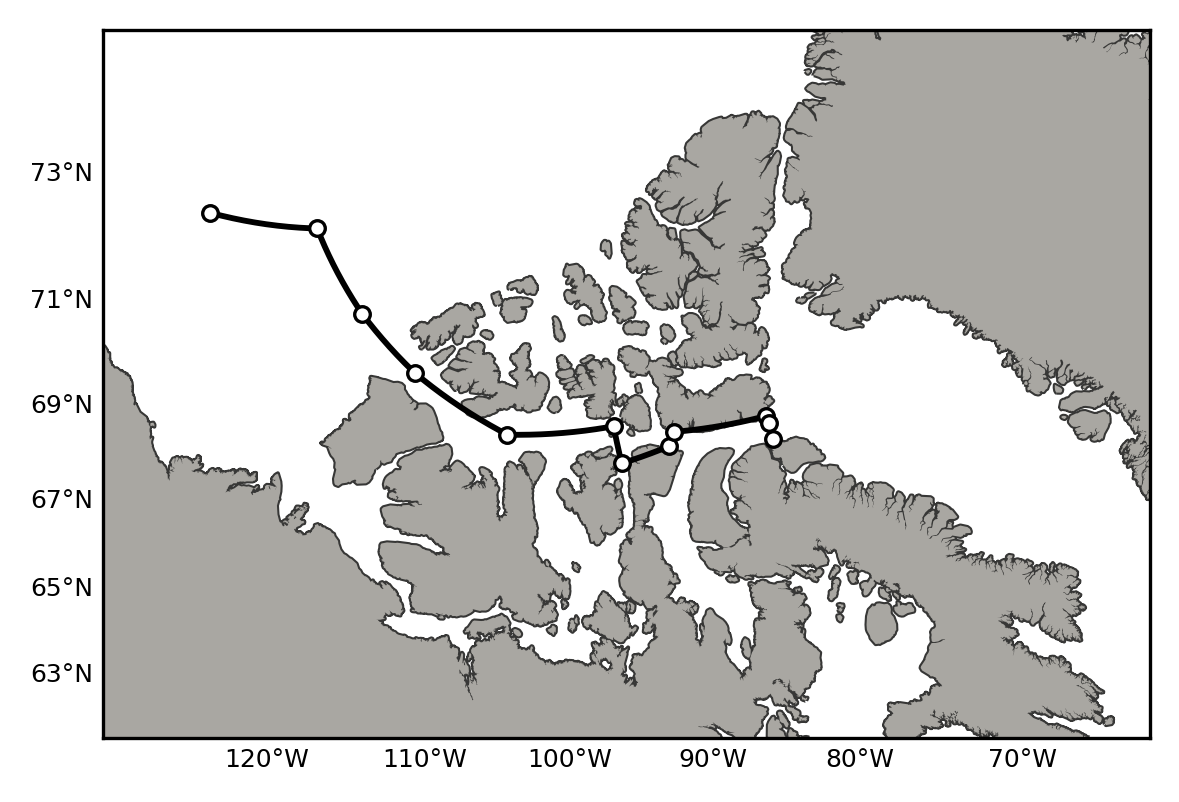

In [21]:
summary_figure(savefig=True)